# Demonstartion of  ISC and IS-RSA in EEG analysis
## Created on 2021.9.27 by Rain, A.N.D lab

In [1]:
%matplotlib inline
import os
import glob
import mne
from mne.viz import plot_topomap
from mne.time_frequency import psd_multitaper
import pandas as pd
import numpy as np
import mantel
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state
from nltools.stats import isc, isps
from jupyterthemes import jtplot
jtplot.style(theme='grade3') 

C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Import the raw EpochEEGLAB format of all subjects
## In this case, we use one of the angry video stimulus for demo

In [2]:
ag1_dir = 'F:/1_Emotion_Data/EEG/Angry/ag1/'
# Import the montage file
montage = mne.channels.read_custom_montage('F:/1_Emotion_Data/EEG/Emotion.loc')
sub_list = [os.path.basename(x).split('_')[1] for x in glob.glob(os.path.join(ag1_dir, '*'))]
sub_list = list(map(int, sub_list))
# Store all subjects into a dict
ag1_meta = {}
for sub in sub_list:
    if sub <= 9:
        file = ag1_dir + 'sub_00' + str(sub) + '_ag1.set'
    else:
        file = ag1_dir + 'sub_0' + str(sub) + '_ag1.set'
    # Use the mne.read_epochs_eeglab() to read the preprocessed data
    tp = mne.read_epochs_eeglab(file)
    # Set the montage
    tp.set_montage(montage)
    ag1_meta[sub] = tp
    del tp

Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_001_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_002_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_003_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_004_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_005_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_006_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_007_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_008_ag1.set...
Not setting metadata


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_009_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_010_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_011_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_012_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_013_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_014_ag1.set...
Not setting metadata


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_015_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_016_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_017_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_018_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_019_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_020_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_021_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_022_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_023_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_024_ag1.set...
Not setting metadata
Not setting metadata
547 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_025_ag1.set...
Not setting metadata
Not setting metadata
547 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_026_ag1.set...
Not setting metadata


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_027_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_028_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_029_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_030_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_031_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_032_ag1.set...
Not setting metadata


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_033_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_034_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_035_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_036_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_037_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_038_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_039_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_040_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_041_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_042_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_043_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_045_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


0 projection items activated
Ready.
Extracting parameters from F:/1_Emotion_Data/EEG/Angry/ag1/sub_046_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_36800/2714011655.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


## Convert the EpochEEGLAB format to dataframe and array

In [ ]:
# Store all dataframes into a dict
ag1_df = {}
for sub in sub_list:
    epe = ag1_meta[sub]
    ag1_df[sub] = epe.to_data_frame().iloc[:,3:]
    del epe
# Store all array into a dict
ag1_data = {}
for sub in sub_list:
    epe = ag1_meta[sub]
    ag1_data[sub] = epe.get_data()
    del epe

## Channel Information & Indexing

In [3]:
# Obtain channel & montage information for topo-plot
topo_info = ag1_meta[1].info
# Obtain the channel names as a list
ch_names = ag1_meta[1].ch_names
# Crate a index list for channels
ch_idx = list(range(63))
# Combine the channels and index and convert to a dict
ch_names = dict(zip(ch_names, ch_idx))
print(ch_names['Fpz'])


59


# Section 1: Extract the data from one channel and condcut ISC by using subjectwise botstrapping (original signal based)

In [ ]:
# Obtain the annotation we interested in for all subjects， 224-264 s in this case
ag11 = {}
for sub in ag1_df:
    # Extract the annotation from the dataframe
    ag11[sub] = ag1_df[sub].iloc[224*250:264*250, :]

# Obtain the specific channel  we interested in
ag11_fpz = {}
for sub in ag11:
    ag11_fpz[sub] = ag11[sub].iloc[:,59]

# Transfer the dict to dataframe for further ISC analysis
ag11_fpz = pd.DataFrame(ag11_fpz)

In [ ]:
# Define a func for bootstrapping
def bootstrap_subject_matrix(similarity_matrix, random_state=None):
    '''This function shuffles subjects within a similarity matrix based on recommendation by Chen et al., 2016'''
    random_state = check_random_state(random_state)
    n_sub = similarity_matrix.shape[0]
    bootstrap_subject = sorted(random_state.choice(np.arange(n_sub), size=n_sub, replace=True))
    return similarity_matrix[bootstrap_subject, :][:, bootstrap_subject]
similarity = 1 - pairwise_distances(ag11_fpz.T, metric='correlation')
f,a = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
sns.heatmap(similarity, square=True, cmap='RdBu_r', vmin=-1, vmax=1, xticklabels=False, yticklabels=False, ax=a[0])
a[0].set_ylabel('Subject', fontsize=18)
a[0].set_xlabel('Subject', fontsize=18)
a[0].set_title('Pairwise Similarity', fontsize=16)

sns.heatmap(bootstrap_subject_matrix(similarity), square=True, cmap='RdBu_r', vmin=-1, vmax=1, xticklabels=False, yticklabels=False, ax=a[1])
a[1].set_ylabel('Subject', fontsize=18)
a[1].set_xlabel('Subject', fontsize=18)
a[1].set_title('Bootstrapped Pairwise Similarity', fontsize=16)

In [ ]:
# Obtain the stats 
stats_boot = isc(ag11_fpz, method='bootstrap', n_bootstraps=5000, return_bootstraps=True)

print(f"ISC: {stats_boot['isc']:.02}, p = {stats_boot['p']:.03}")

In [ ]:
# Plot null distribution
plt.figure(figsize=(12,6))
sns.distplot(stats_boot['null_distribution'] - stats_boot['isc'], kde=True, label='Bootstrap')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('ISC Values (correlation)', fontsize=18)
plt.title('ISC Null Distribution', fontsize=20)
plt.axvline(stats_boot['isc'], linestyle='-', color='red', linewidth=4)
plt.legend(['Observed ISC', 'Bootstrap Null','Circle Shift Null', 'Phase Randomize Null'], fontsize=18)

plt.axvline(stats_boot['ci'][0] - stats_boot['isc'], linestyle='--', color='blue')
plt.axvline(stats_boot['ci'][1] - stats_boot['isc'], linestyle='--', color='blue')

# Section 2: Conduct the whole brain ISC (original amplitude based)

In [ ]:
def singch_amp_isc(df, ch):
    # Construct temporal dict for single channel amplitude
    sc_amp = {}
    for sub in df:
        sc_amp[sub] = df[sub].iloc[:,ch]
    sc_amp = pd.DataFrame(sc_amp)
    stats = isc(sc_amp, n_bootstraps=5000, metric='median', method='bootstrap')
    return stats
        

In [ ]:
# Construct dict to store the isc and p-value
isc_r_am, isc_p_am = {}, {}
# Loop every channel
for ch in ch_idx:
    stats = singch_amp_isc(ag11, ch)
    isc_r_am[ch], isc_p_am[ch] = stats['isc'], stats['p']

In [ ]:
# Extract the ISC and pvalue into array
isc = np.array(list(dict.items(isc_r_am)))[:,1]
pv = np.array(list(dict.items(isc_p_am)))[:,1]
# Plot the ISC and pvalue as topoplot
plot_topomap(isc, topo_info, cmap='RdBu_r', sphere=0.13)
plot_topomap(pv, topo_info, sphere=0.13)

# Section 3: Conduct the whole brain ISC (PSD based)

In [34]:
# Define a func to obtain the single channel ISC of PSD feature
def singch_psd_isc(meta_data, ch, band_min, band_max, start, end): 
    sc_psd = {}
    interval = end-start+1
    interval_start = start-1
    interval_end = end
    for sub in meta_data:
        sc_band = np.zeros((interval))
        for j in range(interval_start, interval_end):
            epoch = meta_data[sub][j]
            psds, freqs = psd_multitaper(epoch,fmin=1, fmax=50)
            psds = 10* np.log10(10**12*psds)
            delta = np.mean(np.squeeze(psds)[ch, band_min-1:band_max], axis=0)
            sc_band[j - interval_start] = delta
        sc_psd[sub] = sc_band
    sc_psd = pd.DataFrame(sc_psd)
    stats = isc(sc_psd, n_bootstraps=5000, metric='median', method='bootstrap')
    return stats

In [36]:
isc_r_psd, isc_p_psd = {}, {}
for ch in ch_idx:
    stats = singch_psd_isc(ag1_meta, ch, band_min=1, band_max=4, start=224, end=264)
    isc_r_psd[ch], isc_p_psd[ch] = stats['isc'], stats['p']
    print('Channel ' + str(ch) + ' completed')

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

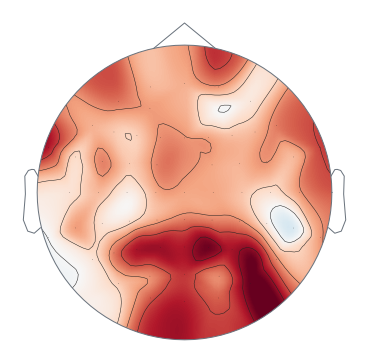

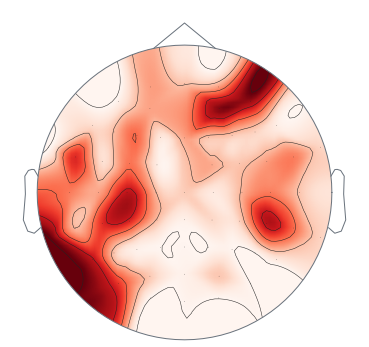

(<matplotlib.image.AxesImage at 0x2320d63f340>,
 <matplotlib.contour.QuadContourSet at 0x2320d58ca90>)

In [37]:
isc_psd = np.array(list(dict.items(isc_r_psd)))[:,1]
pv_psd = np.array(list(dict.items(isc_p_psd)))[:,1]
plot_topomap(isc_psd, topo_info, sphere=0.13)
plot_topomap(pv_psd, topo_info, sphere=0.13)

# Section 4: Time - Frequency ISC

In [ ]:
fs = 250
frequencies = [(1, 4), (4, 7), (7, 13), (13, 30), (30, 45)]
time_freq = {}
for i,cutoff in enumerate(frequencies):
    time_freq[i] = isps(ag11_fpz, low_cut=cutoff[0], high_cut=cutoff[1], sampling_freq=fs, order=5)['vector_length']   
time_freq = pd.DataFrame(time_freq).T
pd.DataFrame(time_freq).index = ['1 - 4Hz','4 - 7Hz','7 - 13Hz','13 - 30Hz', '30 - 45Hz']
f,a = plt.subplots(nrows=1, figsize=(20, 4))
sns.heatmap(time_freq, cmap='hot', vmin=0, vmax=1, xticklabels=False, ax=a)
a.set_title('Fpz Time - Frequency Analysis', fontsize=20)
a.set_ylabel('Frequency Band (Hz)', fontsize=18)
a.set_xlabel('Time', fontsize=18)
plt.show()

# Hypothesis Testing

In [ ]:
n = 45
R = np.arange(0,1, .01)
Z = n*(R**2)

p = np.exp(-1*Z)*(1 + (2*Z - Z**2)/(4*n) - (24*Z - 132*Z**2 +76*Z**3 - 9*Z**4)/(288*n**2))

plt.figure(figsize=(12, 4))
plt.plot(R, p, linewidth=4)
plt.axhline(.05, linestyle='--', color='red')
plt.axvline(.43, linestyle='--', color='darkgrey')
plt.ylabel('p-Value', fontsize=18)
plt.xlabel('Synchrony (Resultant Vector)', fontsize=18)
plt.title('Rayleigh p-value Simulation for N=6', fontsize=20)
plt.legend(['ISPS Values', 'p < 0.05', 'ISPS = 0.43'])